In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import plot_tree
from sklearn import tree

## Problem Statement:<br>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
cloth = pd.read_csv('Company_Data.csv')

In [3]:
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cloth['Sales'].value_counts()

Sales
7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: count, Length: 336, dtype: int64

In [5]:
cloth.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
cloth['Sales'].min()

0.0

In [8]:
cloth['Sales'].max()

16.27

In [9]:
cloth['ShelveLoc'].value_counts()

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

In [10]:
cloth['Urban'].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

In [11]:
cloth['US'].value_counts()

US
Yes    258
No     142
Name: count, dtype: int64

Let's convert the independent categorical variables to 1-hot numerical

In [12]:
replaceStruct = {
                "ShelveLoc":     {"Bad": 0, "Medium": 1 ,"Good": 2},
                "Urban": {"Yes": 1, "No":0},
                "US": {"Yes": 1, "No":0} 
                    }
oneHotCols=["ShelveLoc","Urban","US"]

In [13]:
cloth=cloth.replace(replaceStruct)
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [14]:
cloth=pd.get_dummies(cloth, columns=oneHotCols, dtype = 'uint8', drop_first=True)

In [15]:
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_1,ShelveLoc_2,Urban_1,US_1
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1
3,7.40,117,100,4,466,97,55,14,1,0,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


Let's try to bin the target variable so that it can be considered categorical

In [16]:
bins = [0, 5, 10, 15, 20]
cloth['SalesBin'] = np.digitize(cloth['Sales'], bins, right=False) #right is False as we have '0' in Sales

In [17]:
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_1,ShelveLoc_2,Urban_1,US_1,SalesBin
0,9.50,138,73,11,276,120,42,17,0,0,1,1,2
1,11.22,111,48,16,260,83,65,10,0,1,1,1,3
2,10.06,113,35,10,269,80,59,12,1,0,1,1,3
3,7.40,117,100,4,466,97,55,14,1,0,1,1,2
4,4.15,141,64,3,340,128,38,13,0,0,1,0,1


In [18]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   ShelveLoc_1  400 non-null    uint8  
 9   ShelveLoc_2  400 non-null    uint8  
 10  Urban_1      400 non-null    uint8  
 11  US_1         400 non-null    uint8  
 12  SalesBin     400 non-null    int64  
dtypes: float64(1), int64(8), uint8(4)
memory usage: 29.8 KB


In [19]:
cloth_new = cloth.drop(columns='Sales')
cloth_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_1,ShelveLoc_2,Urban_1,US_1,SalesBin
0,138,73,11,276,120,42,17,0,0,1,1,2
1,111,48,16,260,83,65,10,0,1,1,1,3
2,113,35,10,269,80,59,12,1,0,1,1,3
3,117,100,4,466,97,55,14,1,0,1,1,2
4,141,64,3,340,128,38,13,0,0,1,0,1


cloth['SalesBin'].value_counts()

In [20]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

In [21]:
X = cloth_new.drop('SalesBin',axis=1)
y = cloth_new['SalesBin']

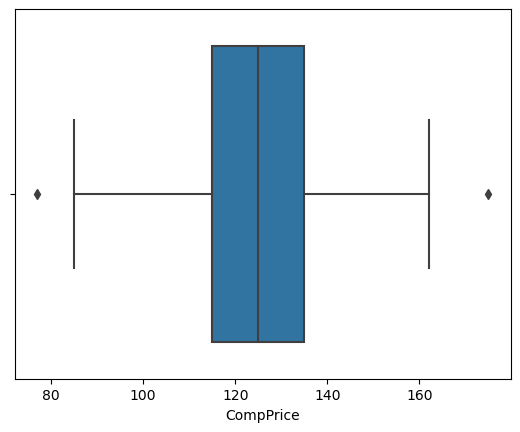

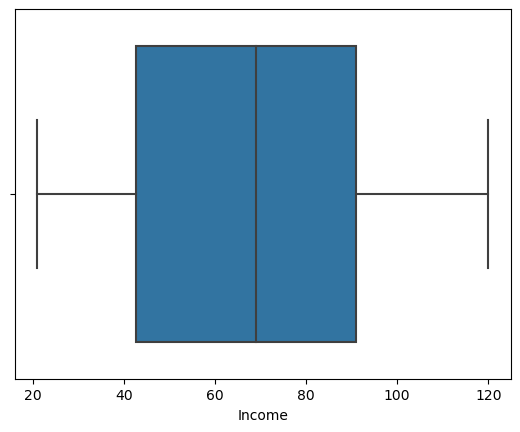

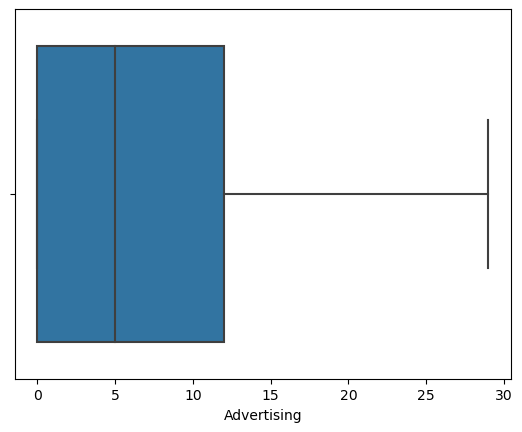

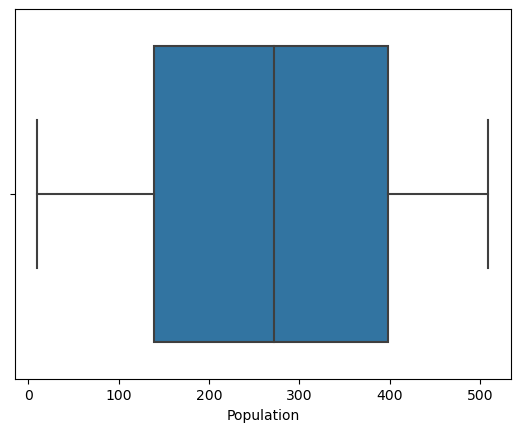

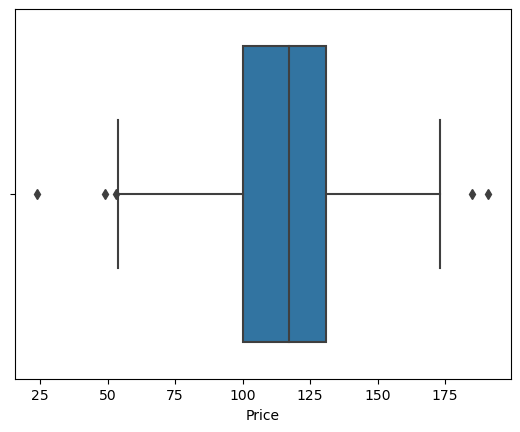

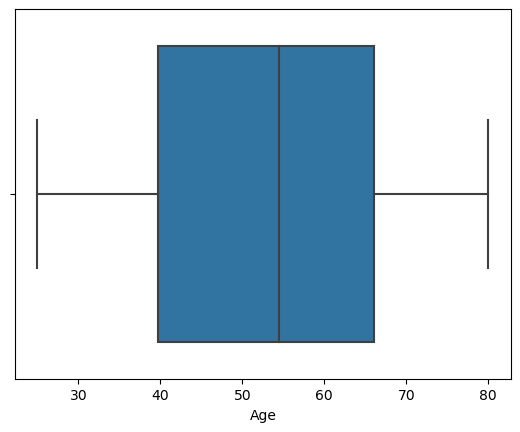

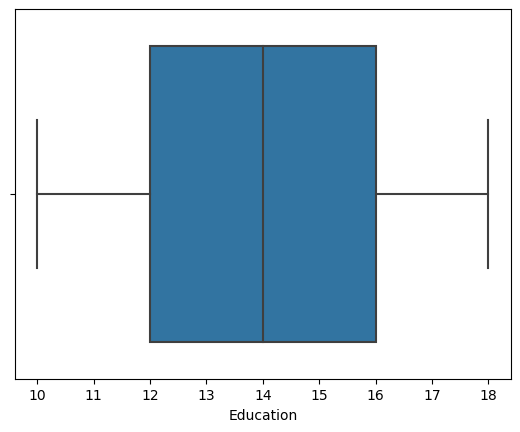

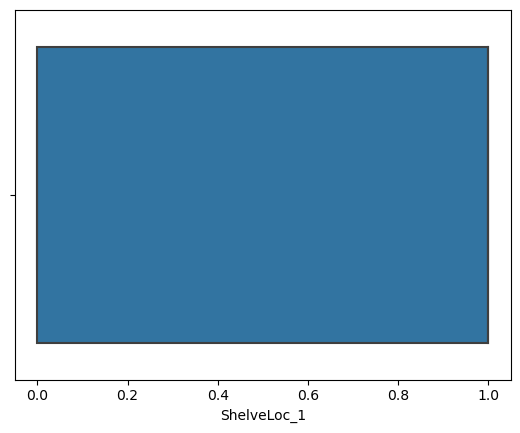

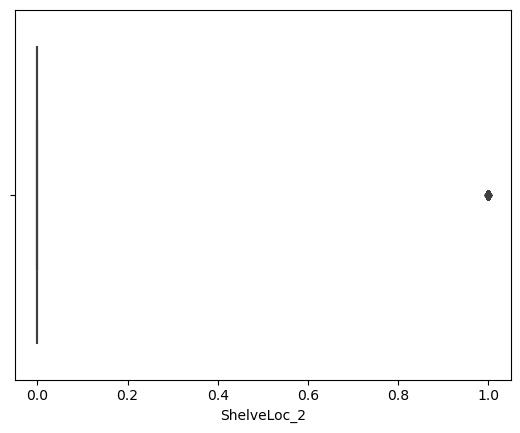

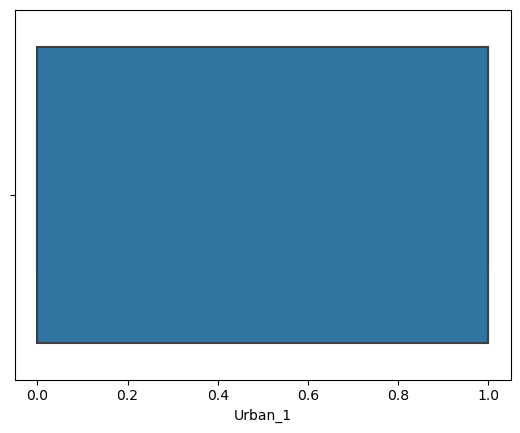

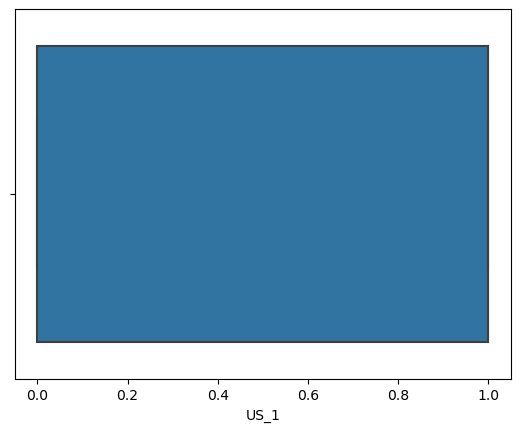

In [22]:
column_boxplots(X,X.columns)

In [23]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

Distribution after outlier removal


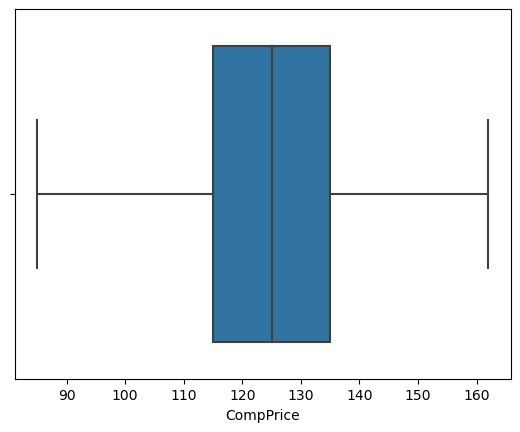

Distribution after outlier removal


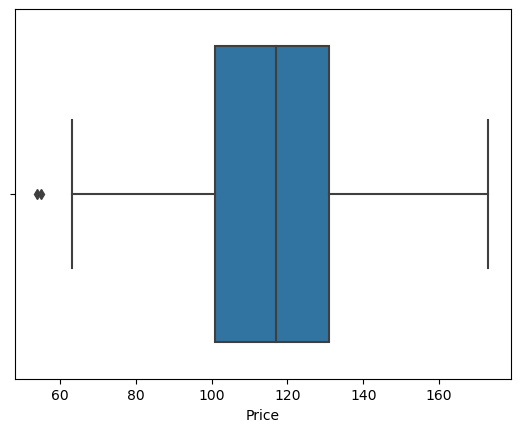

In [24]:
list_cols = ['CompPrice','Price']
for i in list_cols:
    outliers_to_median_values(X,i)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
dTree_model1 = DecisionTreeClassifier(criterion = 'gini')
dTree_model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
print(dTree_model1.score(X_train, y_train)) # accuracy
print(dTree_model1.score(X_test, y_test))

1.0
0.5583333333333333


Let's try to visualize the Decision Tree

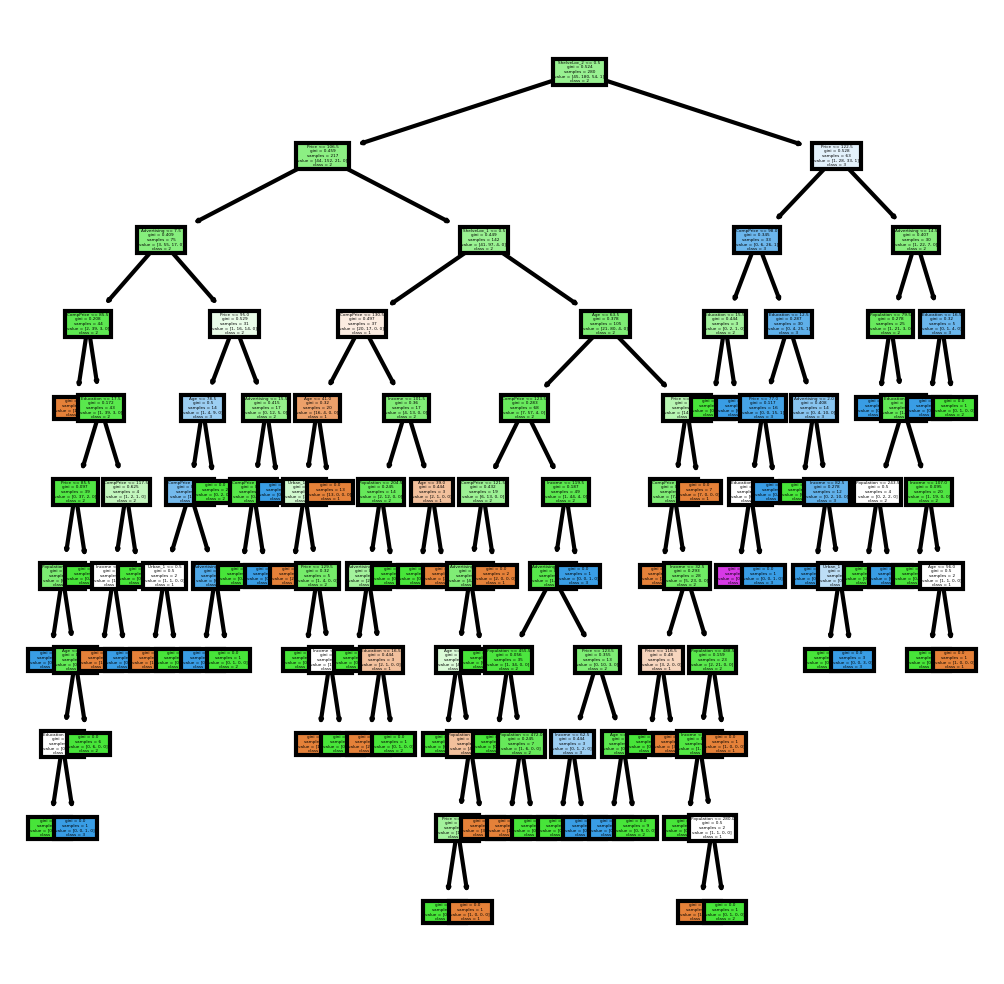

In [28]:
fn = list(X_train)
cn = ['1', '2', '3', '4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree_model1, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

Let's start pruning our tree

In [29]:
dTreeR_Model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dTreeR_Model2.fit(X_train, y_train)
print(dTreeR_Model2.score(X_train, y_train))
print(dTreeR_Model2.score(X_test, y_test))

0.7142857142857143
0.55


In [30]:
dTree_model3 = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 4)
dTree_model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4)

In [31]:
print(dTree_model3.score(X_train, y_train))
print(dTree_model3.score(X_test, y_test))

0.7714285714285715
0.575


Let us try to keep the target variable as is and try Decision Tree Regressor

In [32]:
X = cloth.drop('Sales',axis=1)
y = cloth['Sales']

Distribution after outlier removal


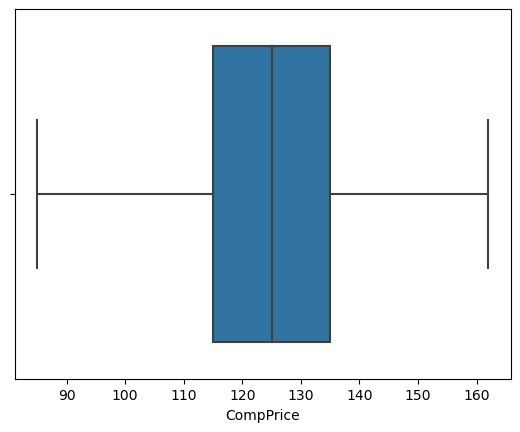

Distribution after outlier removal


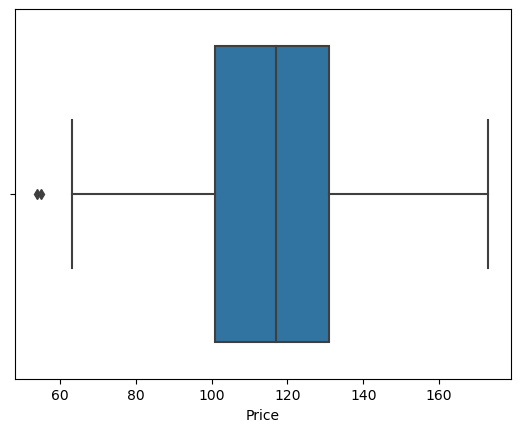

In [33]:
list_cols = ['CompPrice','Price']
for i in list_cols:
    outliers_to_median_values(X,i)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
dTree_model1 = DecisionTreeRegressor(criterion='squared_error',max_depth=3)
dTree_model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [36]:
print(dTree_model1.score(X_train, y_train)) # accuracy
print(dTree_model1.score(X_test, y_test))

0.8182299122833513
0.7560853580323741


In [37]:
dTree_model2 = DecisionTreeRegressor(criterion='absolute_error',max_depth=3)
dTree_model2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [38]:
print(dTree_model2.score(X_train, y_train)) # accuracy
print(dTree_model2.score(X_test, y_test))

0.8192172715288798
0.7353439410576685


## Problem Statement

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [39]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
fraud = fraud.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'}, )

In [41]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [43]:
fraud['Fraud'] = fraud['Taxable_Income'] <= 30000

In [44]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,False
1,YES,Divorced,33700,134075,18,YES,False
2,NO,Married,36925,160205,30,YES,False
3,YES,Single,50190,193264,15,YES,False
4,NO,Married,81002,27533,28,NO,False


In [45]:
label = lambda x: 'Risky' if x else 'Good'
fraud['Fraud'] = fraud['Fraud'].apply(label)

In [46]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [48]:
fraud['Fraud'].value_counts()

Fraud
Good     476
Risky    124
Name: count, dtype: int64

In [49]:
fraud['Marital_Status'].value_counts()

Marital_Status
Single      217
Married     194
Divorced    189
Name: count, dtype: int64

In [50]:
fraud['Undergrad'].value_counts()

Undergrad
YES    312
NO     288
Name: count, dtype: int64

In [51]:
fraud['Urban'].value_counts()

Urban
YES    302
NO     298
Name: count, dtype: int64

In [52]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Fraud            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [53]:
replaceStruct = {
                "Marital_Status":     {"Single": 0, "Married": 1 ,"Divorced": 2},
                "Undergrad": {"YES": 1, "NO":0},
                "Urban": {"YES": 1, "NO":0} 
                    }
oneHotCols=["Marital_Status","Undergrad","Urban"]

In [54]:
fraud=pd.get_dummies(fraud, columns=oneHotCols, dtype = 'uint8', drop_first=True)

In [55]:
fraud.head()

,Taxable_Income,City_Population,Work_Experience,Fraud,Marital_Status_Married,Marital_Status_Single,Undergrad_YES,Urban_YES
0,68833,50047,10,Good,0,1,0,1
1,33700,134075,18,Good,0,0,1,1
2,36925,160205,30,Good,1,0,0,1
3,50190,193264,15,Good,0,1,1,1
4,81002,27533,28,Good,1,0,0,0


In [56]:
X = fraud.drop(columns='Fraud')
y = fraud['Fraud']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
dTree_model1 = DecisionTreeClassifier(criterion = 'gini')
dTree_model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
print(dTree_model1.score(X_train, y_train)) # accuracy
print(dTree_model1.score(X_test, y_test))

1.0
0.9944444444444445


In [61]:
dTreeR_Model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dTreeR_Model2.fit(X_train, y_train)
print(dTreeR_Model2.score(X_train, y_train))
print(dTreeR_Model2.score(X_test, y_test))

1.0
0.9944444444444445
